# install dependencies

In [28]:
!pip3 install kora -q
from kora import drive
drive.link_nbs()
%cd "/content/drive/MyDrive/EBR"
from constants import inverse_canopy_version
import subprocess
subprocess.run(["pip3", "install", f"inverse-canopy=={inverse_canopy_version}"])

/content/drive/MyDrive/EBR


CompletedProcess(args=['pip3', 'install', 'inverse-canopy==0.0.21'], returncode=0)

# **Model Inputs**

In [1]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

2024-08-18 16:41:34.138034: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-18 16:41:34.142911: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-18 16:41:34.156017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 16:41:34.175944: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 16:41:34.181879: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-18 16:41:34.198281: I tensorflow/core/platform/cpu_feature_gu

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.05,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 6.3791393862971963, performing 190.5 it/sec
Step 100: Loss = 2.7177104039417741, performing 628.0 it/sec
Step 200: Loss = 1.3415733855572636, performing 505.7 it/sec
Step 300: Loss = 0.5179904133565959, performing 483.5 it/sec
Step 400: Loss = 0.0209245098156290, performing 536.2 it/sec
No improvement since Step 394, early stopping.
[Best]  Step 393: Loss = 0.0159504107158283
[Final] Step 443: Loss = 0.0176940912781520

predicted end states
------------------------------------
         5th       Mean      95th
SHDL-1  5.00e-01  5.00e-01  5.00e-01
SHDL-2  1.55e-09  1.62e-09  1.70e-09
SHDL-3  2.81e-10  2.94e-10  3.08e-10


predicted conditional events
----------------------------------
       5th       Mean      95th
ANTC  1.00e+00  1.00e+00  1.00e+00
BPHR  3.65e-09  3.83e-09  4.01e-09
DHRS  1.54e-01  1.54e-01  1.54e-01




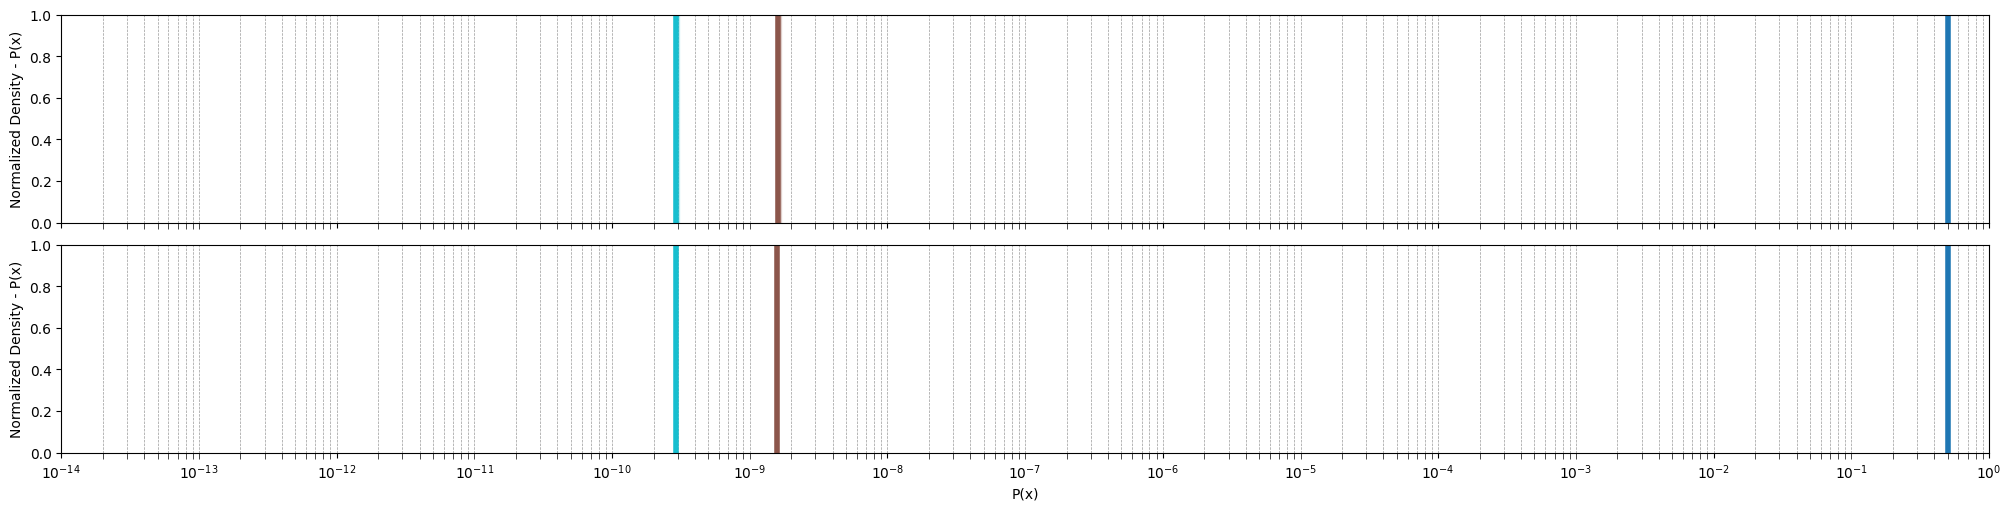

In [8]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.05,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 5e-1,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['ANTC', 'BPHR', 'DHRS'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    # 'SHDL-0': {
    #     'sequence': [0, np.nan, np.nan],
    #     'probability': 1.0 -  5.0e-1 - 1.57e-9 - 2.9e-10, # one minus all the other end-states
    # },
    'SHDL-1': {
        'sequence': [1, 0, np.nan],
        'probability': 5e-1,
    },
    'SHDL-2': {
        'sequence': [1, 1, 0],
        'probability': 1.57e-9,
    },
    'SHDL-3': {
        'sequence': [1, 1, 1],
        'probability': 2.9e-10,
      },

}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)